In [82]:
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import os
import math
import scipy.stats as stats
import copy
import functools
import statistics

%matplotlib inline

In [28]:
from trackml.dataset import load_event
hits_list = [load_event('data/train_100_events/event00000' + str(i))[0] for i in range (1000,1100)]
hits = pd.concat(hits_list, axis = 0)
cells_list = [load_event('data/train_100_events/event00000' + str(i))[1] for i in range (1000,1100)]
cells = pd.concat(cells_list, axis = 0)
particles_list = [load_event('data/train_100_events/event00000' + str(i))[2] for i in range (1000,1100)]
particles = pd.concat(particles_list, axis = 0)
truth_list = [load_event('data/train_100_events/event00000' + str(i))[3] for i in range (1000,1100)]
truth = pd.concat(truth_list, axis = 0)

In [83]:
def expected_freq_computation_continuous(cdf,partition_separators,n):
    expected_freq = []
    for i in range(0,len(partition_separators) + 1):
        if i == 0:
            sep_1 = partition_separators[i]
            expected_freq.append(cdf(sep_1)*n)
        elif i == len(partition_separators):
            sep_2 = partition_separators[i-1]
            expected_freq.append((1-cdf(sep_2))*n)
        else:
            sep_1 = partition_separators[i]
            sep_2 = partition_separators[i-1]
            expected_freq.append((cdf(sep_1) - cdf(sep_2))*n)
    return expected_freq

def merge_partition(i_lower, ps, c):
    counts = copy.deepcopy(c)
    partition_separators = copy.deepcopy(ps)
    i = i_lower
    counts[i+1] = counts[i] + counts[i+1]
    del counts[i]
    del partition_separators[i]
    return (partition_separators, counts)

In [84]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [85]:
cells.head()

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005


In [86]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


In [87]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


In [88]:
particles.size

9712314

(array([2.33126e+05, 5.10850e+04, 8.50300e+04, 8.16000e+04, 2.26186e+05,
        3.45775e+05, 5.08740e+04, 5.39800e+03, 6.50000e+01, 7.00000e+00]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

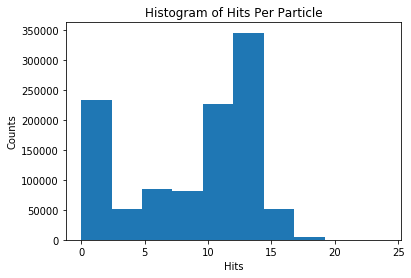

In [89]:
plt.xlabel('Hits')
plt.ylabel('Counts')
plt.title('Histogram of Hits Per Particle')
plt.hist(particles.nhits)

In [90]:
pos_part = particles[particles.q == 1]
neg_part = particles[particles.q == -1]

(array([1.45133e+05, 3.07830e+04, 3.35920e+04, 6.09430e+04, 1.11618e+05,
        1.41537e+05, 6.95210e+04, 3.09100e+03, 2.10000e+02, 1.30000e+01]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

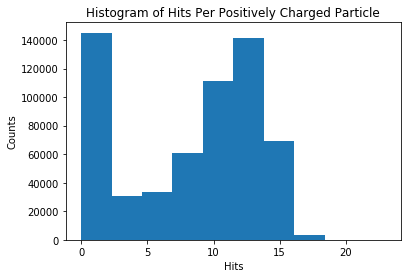

In [91]:
plt.xlabel('Hits')
plt.ylabel('Counts')
plt.title('Histogram of Hits Per Positively Charged Particle')
plt.hist(pos_part.nhits)

(array([8.79930e+04, 2.03020e+04, 3.41450e+04, 3.79500e+04, 1.14568e+05,
        1.63092e+05, 2.24990e+04, 2.13500e+03, 1.90000e+01, 2.00000e+00]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

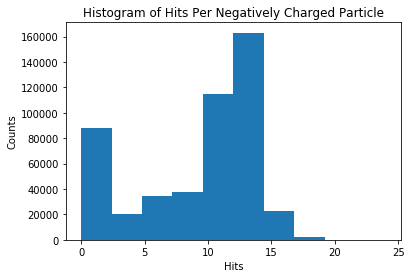

In [92]:
plt.xlabel('Hits')
plt.ylabel('Counts')
plt.title('Histogram of Hits Per Negatively Charged Particle')
plt.hist(neg_part.nhits)

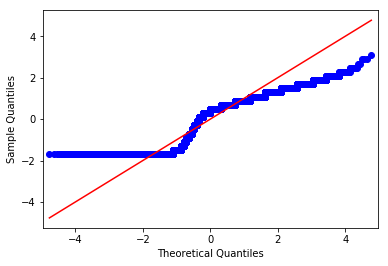

In [93]:
fig = qqplot(particles.nhits, fit = True, line='s')


## Attempting to Deal with Bimodality

Through truncating the data

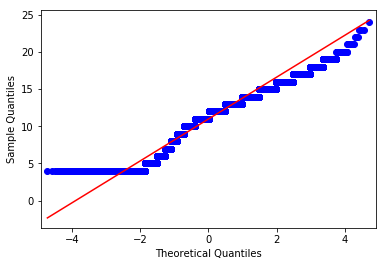

In [94]:
trunc_nhits = particles[particles.nhits >3].nhits
fig = qqplot(trunc_nhits, line='s')

### Analysis

What is going on with these QQ Plots?

(array([5.43260e+04, 5.71710e+04, 8.16000e+04, 2.26186e+05, 2.70160e+05,
        1.12117e+05, 1.86080e+04, 1.16200e+03, 6.50000e+01, 7.00000e+00]),
 array([ 4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.]),
 <a list of 10 Patch objects>)

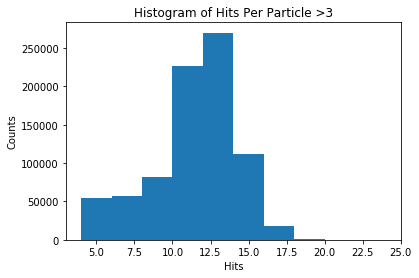

In [95]:
plt.xlabel('Hits')
plt.ylabel('Counts')
plt.title('Histogram of Hits Per Particle >3')
plt.hist(trunc_nhits)

# Adding Noise Because Discrete Data Looks Weird

Hudson's Idea

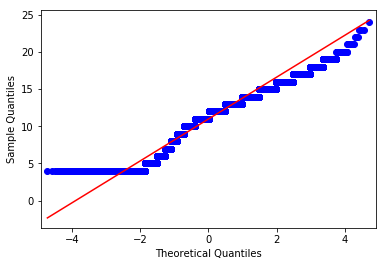

In [96]:
s = 0.0001
eps = np.random.normal(0,s, trunc_nhits.shape)
trunc_nhits_random = trunc_nhits + eps

fig = qqplot(trunc_nhits_random, line='s')

# Analysis

By adding noise, we see that normality is restored, so we can trust that QQ-plot is working

# Is total hits in an event normally distributed?

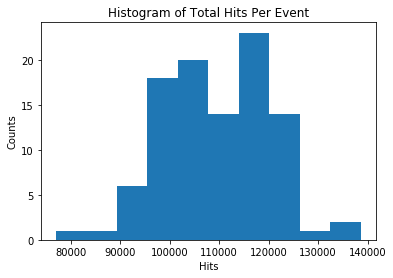

In [97]:
hits_per_event = [hits.shape[0] for hits in hits_list]

plt.xlabel('Hits')
plt.ylabel('Counts')
plt.title('Histogram of Total Hits Per Event')
hpe_counts, hpe_partition, _ = plt.hist(hits_per_event)
hpe_counts = list(hpe_counts)
hpe_partition = list(hpe_partition)


## Chi-Square Test

In [98]:

hpe_counts.insert(0,0)
hpe_counts.append(0)
hpe_partition, hpe_counts = merge_partition(0,hpe_partition,hpe_counts)                                           
hpe_partition, hpe_counts = merge_partition(0,hpe_partition,hpe_counts)
hpe_partition, hpe_counts = merge_partition(0,hpe_partition,hpe_counts)
hpe_partition, hpe_counts = merge_partition(len(hpe_partition)-1, hpe_partition, hpe_counts)
hpe_partition, hpe_counts = merge_partition(len(hpe_partition)-1, hpe_partition, hpe_counts)
hpe_partition, hpe_counts = merge_partition(len(hpe_partition)-1, hpe_partition, hpe_counts)

partial_norm_cdf = functools.partial(stats.norm.cdf, loc = statistics.mean(hits_per_event), scale = statistics.stdev(hits_per_event))
expected_counts = expected_freq_computation_continuous(partial_norm_cdf,hpe_partition,sum(hpe_counts))
stats.chisquare(hpe_counts,expected_counts, 2)

Power_divergenceResult(statistic=6.369156618725524, pvalue=0.09496795668496887)

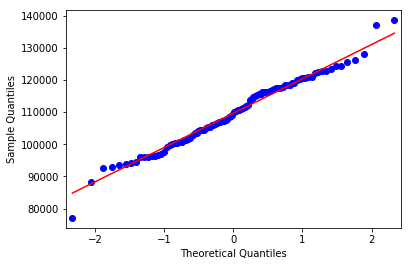

In [99]:
fig = qqplot(np.array(hits_per_event), line='s')

## Conclusion

The total number of hist per event is normally distributed.
QQ-plot shows this and we also fail to reject the null hypothesis in the chi-square test

# "Most Normal" Chopping Off From Bimodal

Attempting to look for the most normally shaped truncation of the data. We use the first 30 events to use as a 'training set' so then we can test on the remaining 70 events.

(array([7.3463e+04, 1.6164e+04, 1.7465e+04, 3.4523e+04, 7.1492e+04,
        8.4818e+04, 3.9726e+04, 1.6020e+03, 8.2000e+01, 5.0000e+00]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

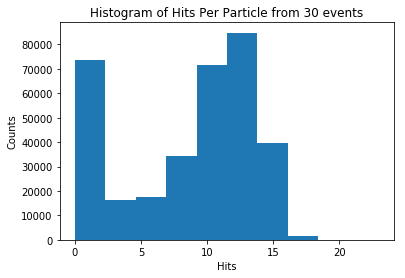

In [100]:
first_30_events_particles = pd.concat(particles_list[0:30], axis = 0) # for training
part_nhits_30 = first_30_events_particles.nhits
plt.xlabel('Hits')
plt.ylabel('Counts')
plt.title('Histogram of Hits Per Particle from 30 events')
plt.hist(part_nhits_30)

In [101]:
p_val_list = []
for i in range (min(part_nhits_30)-1,max(part_nhits_30)):
    trunc_i = first_30_events_particles[first_30_events_particles.nhits > i].nhits.tolist()
    if(len(trunc_i) > 11):
        stat, pval = stats.normaltest(trunc_i)
        p_val_list.append(pval)
print(max(p_val_list))

0.00015139840946522184


C:\Users\acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


## Analysis

Garbage, P-values were all small! Couldn't extract normality even in training!

# Is the proportion of particles never detected constant across each collision?

Hypothesis: the proportion should be normal with a 'small' variance

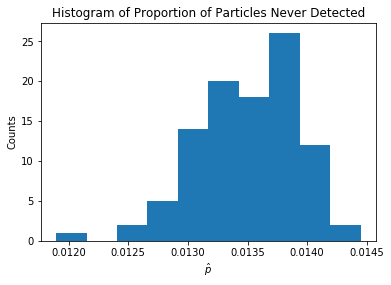

In [102]:
p_list = []
for i in range(0, len(hits_list)):
    no_hits_count = 0
    for j in range(0,particles_list[i].shape[0]):
        if particles_list[i]['nhits'][j] == 0:
            no_hits_count += 1
    p_list.append(float(no_hits_count)/float(hits_list[i].shape[0]))

plt.xlabel('$\hat{p}$')
plt.ylabel('Counts')
plt.title('Histogram of Proportion of Particles Never Detected')
hpe_counts, hpe_partition, _ = plt.hist(p_list)
hpe_counts = list(hpe_counts)
hpe_partition = list(hpe_partition)

## Chi-Square Test

In [103]:

hpe_counts.insert(0,0)
hpe_counts.append(0)
hpe_partition, hpe_counts = merge_partition(0,hpe_partition,hpe_counts)                                           
hpe_partition, hpe_counts = merge_partition(0,hpe_partition,hpe_counts)
hpe_partition, hpe_counts = merge_partition(0,hpe_partition,hpe_counts)
hpe_partition, hpe_counts = merge_partition(0,hpe_partition,hpe_counts)
hpe_partition, hpe_counts = merge_partition(len(hpe_partition)-1, hpe_partition, hpe_counts)
hpe_partition, hpe_counts = merge_partition(len(hpe_partition)-1, hpe_partition, hpe_counts)
partial_norm_cdf = functools.partial(stats.norm.cdf, loc = statistics.mean(p_list), scale = statistics.stdev(p_list))
expected_counts = expected_freq_computation_continuous(partial_norm_cdf,hpe_partition,sum(hpe_counts))
stats.chisquare(hpe_counts,expected_counts, 2)

Power_divergenceResult(statistic=4.823731732046528, pvalue=0.18516885041107395)

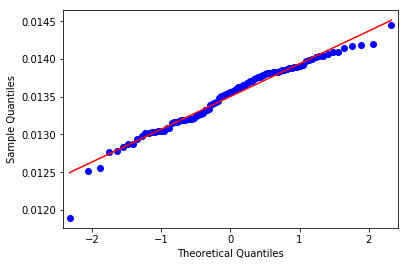

In [104]:
fig = qqplot(np.array(p_list), line='s')

## Analysis

QQ-plot and P-value both indicate normality

# A Meticulous Analysis of the Initial Angles of the Particles

In [105]:
thetas = []
phis = []
norms = []
for i in range(0,particles_list[0].shape[0]):
    x = particles_list[0]['px'][i]
    y = particles_list[0]['py'][i]
    z = particles_list[0]['pz'][i]
    norms.append(math.sqrt(x*x + y*y + z*z))
    thetas.append(math.atan2(y,x))
    phis.append(math.acos(z/norms[i]))
    

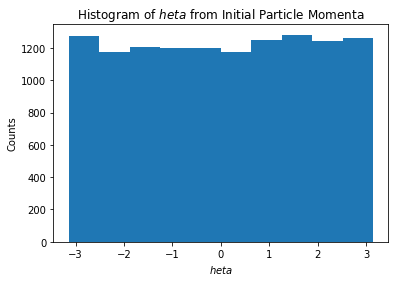

In [106]:
plt.xlabel('$\theta$')
plt.ylabel('Counts')
plt.title('Histogram of $\theta$ from Initial Particle Momenta')
hpe_counts, hpe_partition, _ = plt.hist(thetas)
hpe_counts = list(hpe_counts)
hpe_partition = list(hpe_partition)

## $\theta$ Chi-Square Test for Uniformity

In [107]:
hpe_counts.insert(0,0)
hpe_counts.append(0)
a = min(thetas)
b = max(thetas)
hpe_partition, hpe_counts = merge_partition(0,hpe_partition,hpe_counts)
hpe_partition, hpe_counts = merge_partition(len(hpe_partition)-1, hpe_partition, hpe_counts)
partial_unif_cdf = functools.partial(stats.uniform.cdf, loc = a, scale = b-a)
expected_counts = expected_freq_computation_continuous(partial_unif_cdf,hpe_partition,sum(hpe_counts))
stats.chisquare(hpe_counts,expected_counts, 2)

Power_divergenceResult(statistic=12.173285492946379, pvalue=0.09500236619340857)

(array([2653.,  995.,  866.,  769.,  859.,  860.,  833.,  771., 1025.,
        2632.]),
 array([0.03662991, 0.34383297, 0.65103603, 0.95823909, 1.26544215,
        1.57264521, 1.87984827, 2.18705133, 2.49425439, 2.80145744,
        3.1086605 ]),
 <a list of 10 Patch objects>)

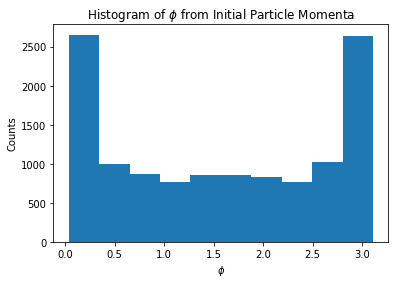

In [108]:
plt.xlabel('$\phi$')
plt.ylabel('Counts')
plt.title('Histogram of $\phi$ from Initial Particle Momenta')
plt.hist(phis)

(array([1.2235e+04, 2.1000e+01, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00735817e-01, 4.62667451e+01, 9.24327543e+01, 1.38598764e+02,
        1.84764773e+02, 2.30930782e+02, 2.77096791e+02, 3.23262801e+02,
        3.69428810e+02, 4.15594819e+02, 4.61760828e+02]),
 <a list of 10 Patch objects>)

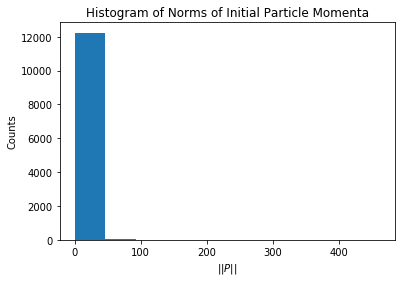

In [109]:
plt.xlabel('$||P||$')
plt.ylabel('Counts')
plt.title('Histogram of Norms of Initial Particle Momenta')
plt.hist(norms)

## Filtering out IQR

In [110]:
normsdf = pd.DataFrame(norms)
Q1 = normsdf[0].quantile(0.25)
Q3 = normsdf[0].quantile(0.75)
IQR = Q3 - Q1

normsdf_iqr = normsdf[(Q1 - 1.5*IQR <= normsdf[0]) & (normsdf[0] <= Q3 + 1.5*IQR)]

print(normsdf_iqr)


              0
0      0.385964
1      2.271788
2      1.124602
3      1.227834
5      3.983595
6      6.200329
7      0.546923
8      1.794422
9      0.248157
10     0.535478
11     5.378609
12     5.272305
13     5.818588
15     4.007491
16     6.984887
17     3.663112
18     2.267978
19     1.005222
20     4.643914
21     7.518519
22     1.622256
23     1.034061
24     2.306245
25     0.573479
26     0.333182
27     1.699170
28     5.451048
29     0.298398
30     0.731802
31     0.505140
...         ...
12233  0.840950
12234  2.851312
12235  0.858193
12236  1.211865
12237  0.388219
12238  0.806105
12239  0.262644
12240  0.133099
12241  0.134767
12242  0.438728
12243  0.606220
12244  1.303399
12245  1.305734
12246  0.138008
12247  0.492097
12248  0.223443
12249  0.284233
12250  0.251187
12251  0.202943
12252  0.446556
12253  1.079898
12254  0.186033
12255  0.785772
12256  1.002594
12257  1.042459
12258  0.185900
12259  0.300697
12260  1.347183
12261  0.431467
12262  0.192788

[10987 

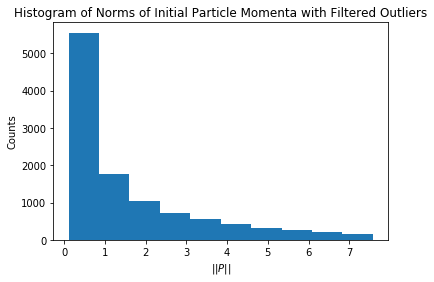

In [111]:
plt.xlabel('$||P||$')
plt.ylabel('Counts')
plt.title('Histogram of Norms of Initial Particle Momenta with Filtered Outliers')
hpe_counts, hpe_partition, _ = plt.hist(normsdf_iqr[0])
hpe_counts = list(hpe_counts)
hpe_partition = list(hpe_partition)

In [112]:
hpe_counts.insert(0,0)
hpe_counts.append(0)
hpe_partition, hpe_counts = merge_partition(0,hpe_partition,hpe_counts)
hpe_partition, hpe_counts = merge_partition(len(hpe_partition)-1, hpe_partition, hpe_counts)
print(hpe_counts)
print(hpe_partition)
partial_unif_cdf = functools.partial(stats.expon.cdf, loc = 0, scale = statistics.mean(normsdf_iqr[0]))
expected_counts = expected_freq_computation_continuous(partial_unif_cdf,hpe_partition,sum(hpe_counts))
print(expected_counts)
stats.chisquare(hpe_counts,expected_counts, 2)

[5552.0, 1773.0, 1028.0, 709.0, 547.0, 420.0, 320.0, 271.0, 199.0, 168.0]
[0.8488899874155892, 1.5970441582471606, 2.345198329078732, 3.0933524999103037, 3.8415066707418752, 4.589660841573446, 5.337815012405017, 6.085969183236589, 6.8341233540681605]
[4552.557976583711, 2419.148837660243, 1509.6245809406678, 942.0529815703527, 587.8705416498982, 366.84961514973526, 228.92564025713082, 142.8567636516299, 89.14709116067226, 147.96597137595933]


Power_divergenceResult(statistic=903.1068007763638, pvalue=1.0243592142950978e-190)